### __Name: Ishita Mehta__

### Task 5:
- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.
- As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
- Suggest teams or players a company should endorse for its products.
<br><br>
- Dataset: https://bit.ly/34SRn3b

### Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'white'})

### Load the Dataset

In [2]:
deli= pd.read_csv('deliveries.csv')
matches= pd.read_csv('matches.csv')

### Data Preprocessing

Checking null values :

In [3]:
deli.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [4]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
## Dropping umpire3,
matches.drop(['umpire3'],axis=1, inplace=True)

In [6]:
## Replacing null values with 0's,
deli=deli.fillna(0)
matches=matches.fillna(0)

Text(0, 0.5, 'Count')

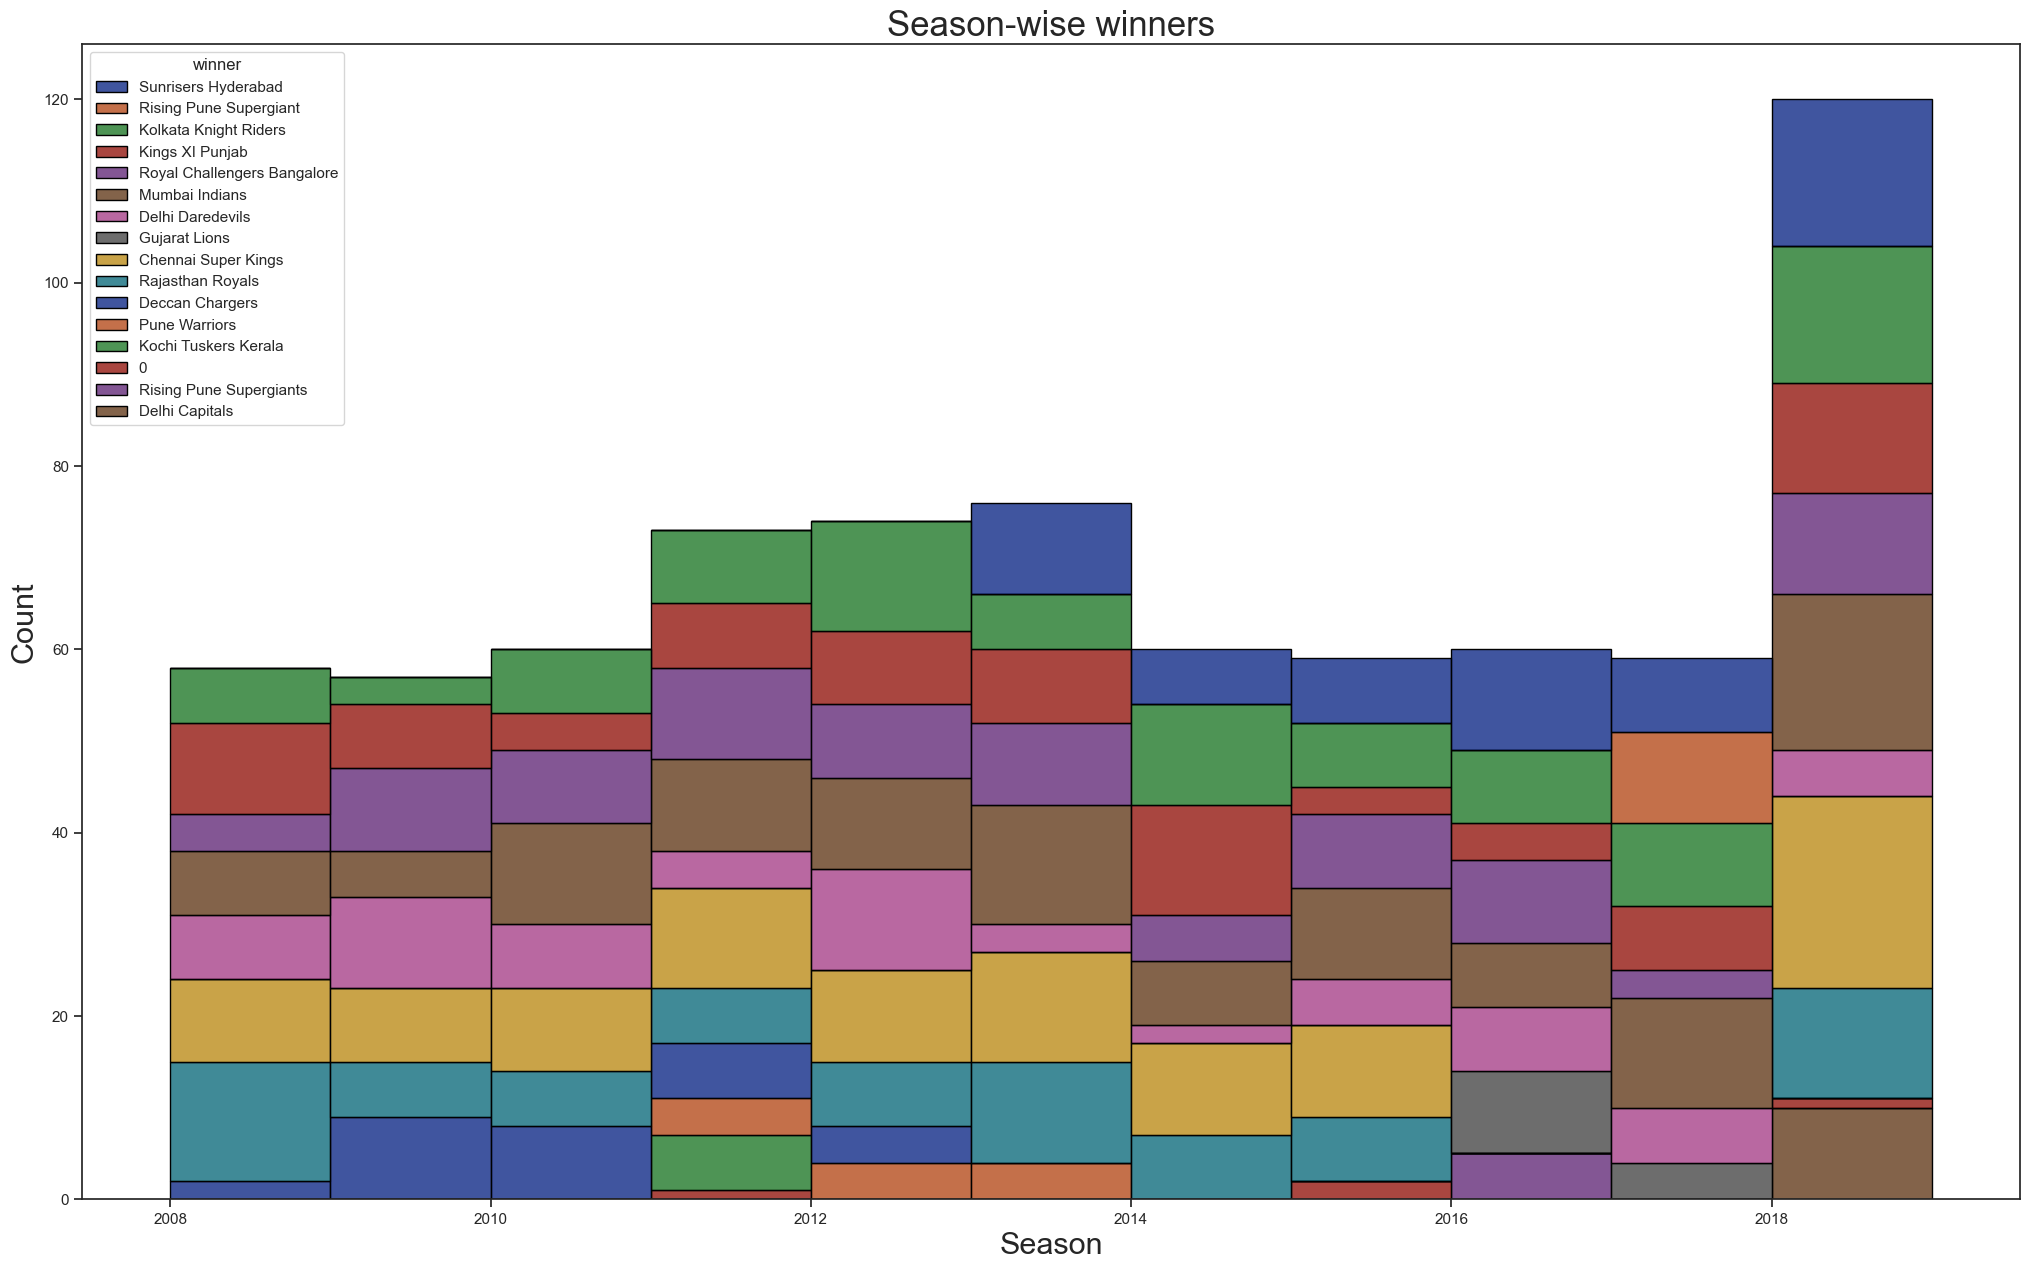

In [7]:
## To find the count of each team winning per season.
plt.figure(figsize=(25,15))
sns.set_theme(style="ticks")
sns.histplot (data= matches, x='season', hue='winner',log_scale=False,palette="dark",
    edgecolor="0", multiple='stack')
plt.title('Season-wise winners', fontsize=25)
plt.xlabel('Season',fontsize=22)
plt.ylabel('Count',fontsize=22)

Text(0.5, 1.0, 'Toss Winners')

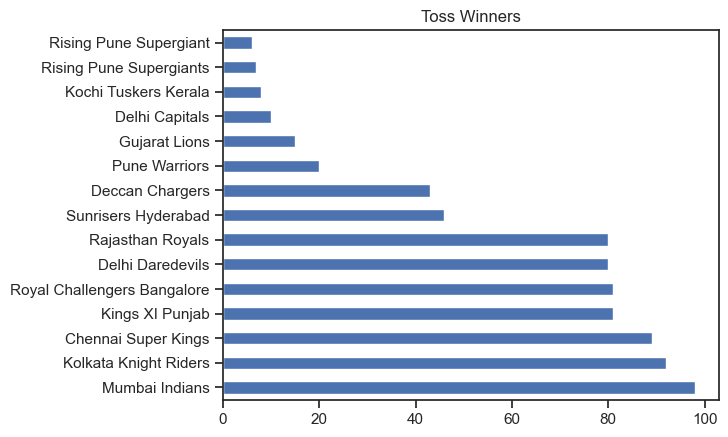

In [56]:
## Number of tosses won by each team.
matches['toss_winner'].value_counts().plot.barh()
plt.title('Toss Winners')

Text(0.5, 1.0, 'Match Winners')

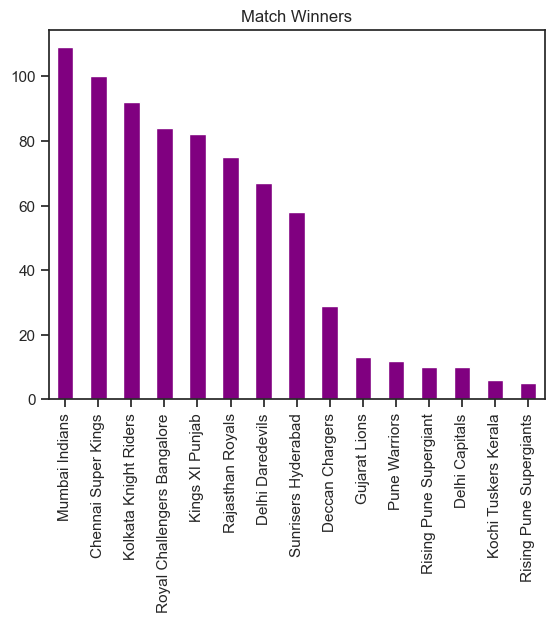

In [57]:
matches['winner'].value_counts().drop(0).plot.bar(color='purple') 
plt.title('Match Winners')

<AxesSubplot:xlabel='toss_winner', ylabel='Count'>

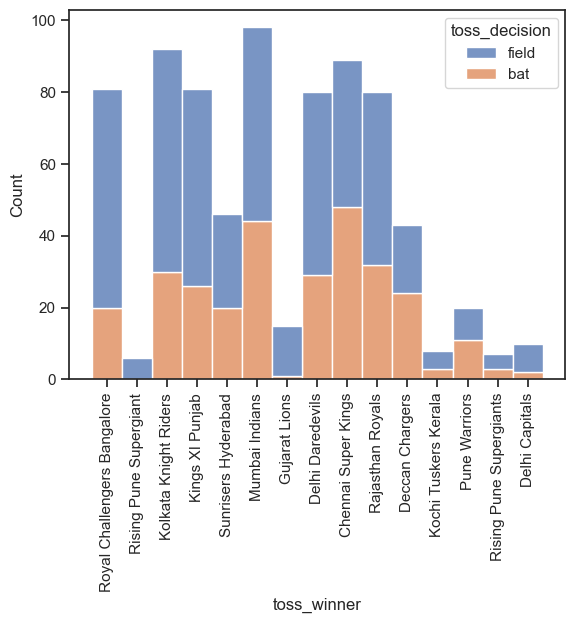

In [10]:
## Toss decision made by each team on winning the toss.
plt.xticks(rotation='vertical')
sns.histplot (data= matches, x='toss_winner', hue='toss_decision', multiple="stack",log_scale=False)

Text(0.5, 0, 'Winner')

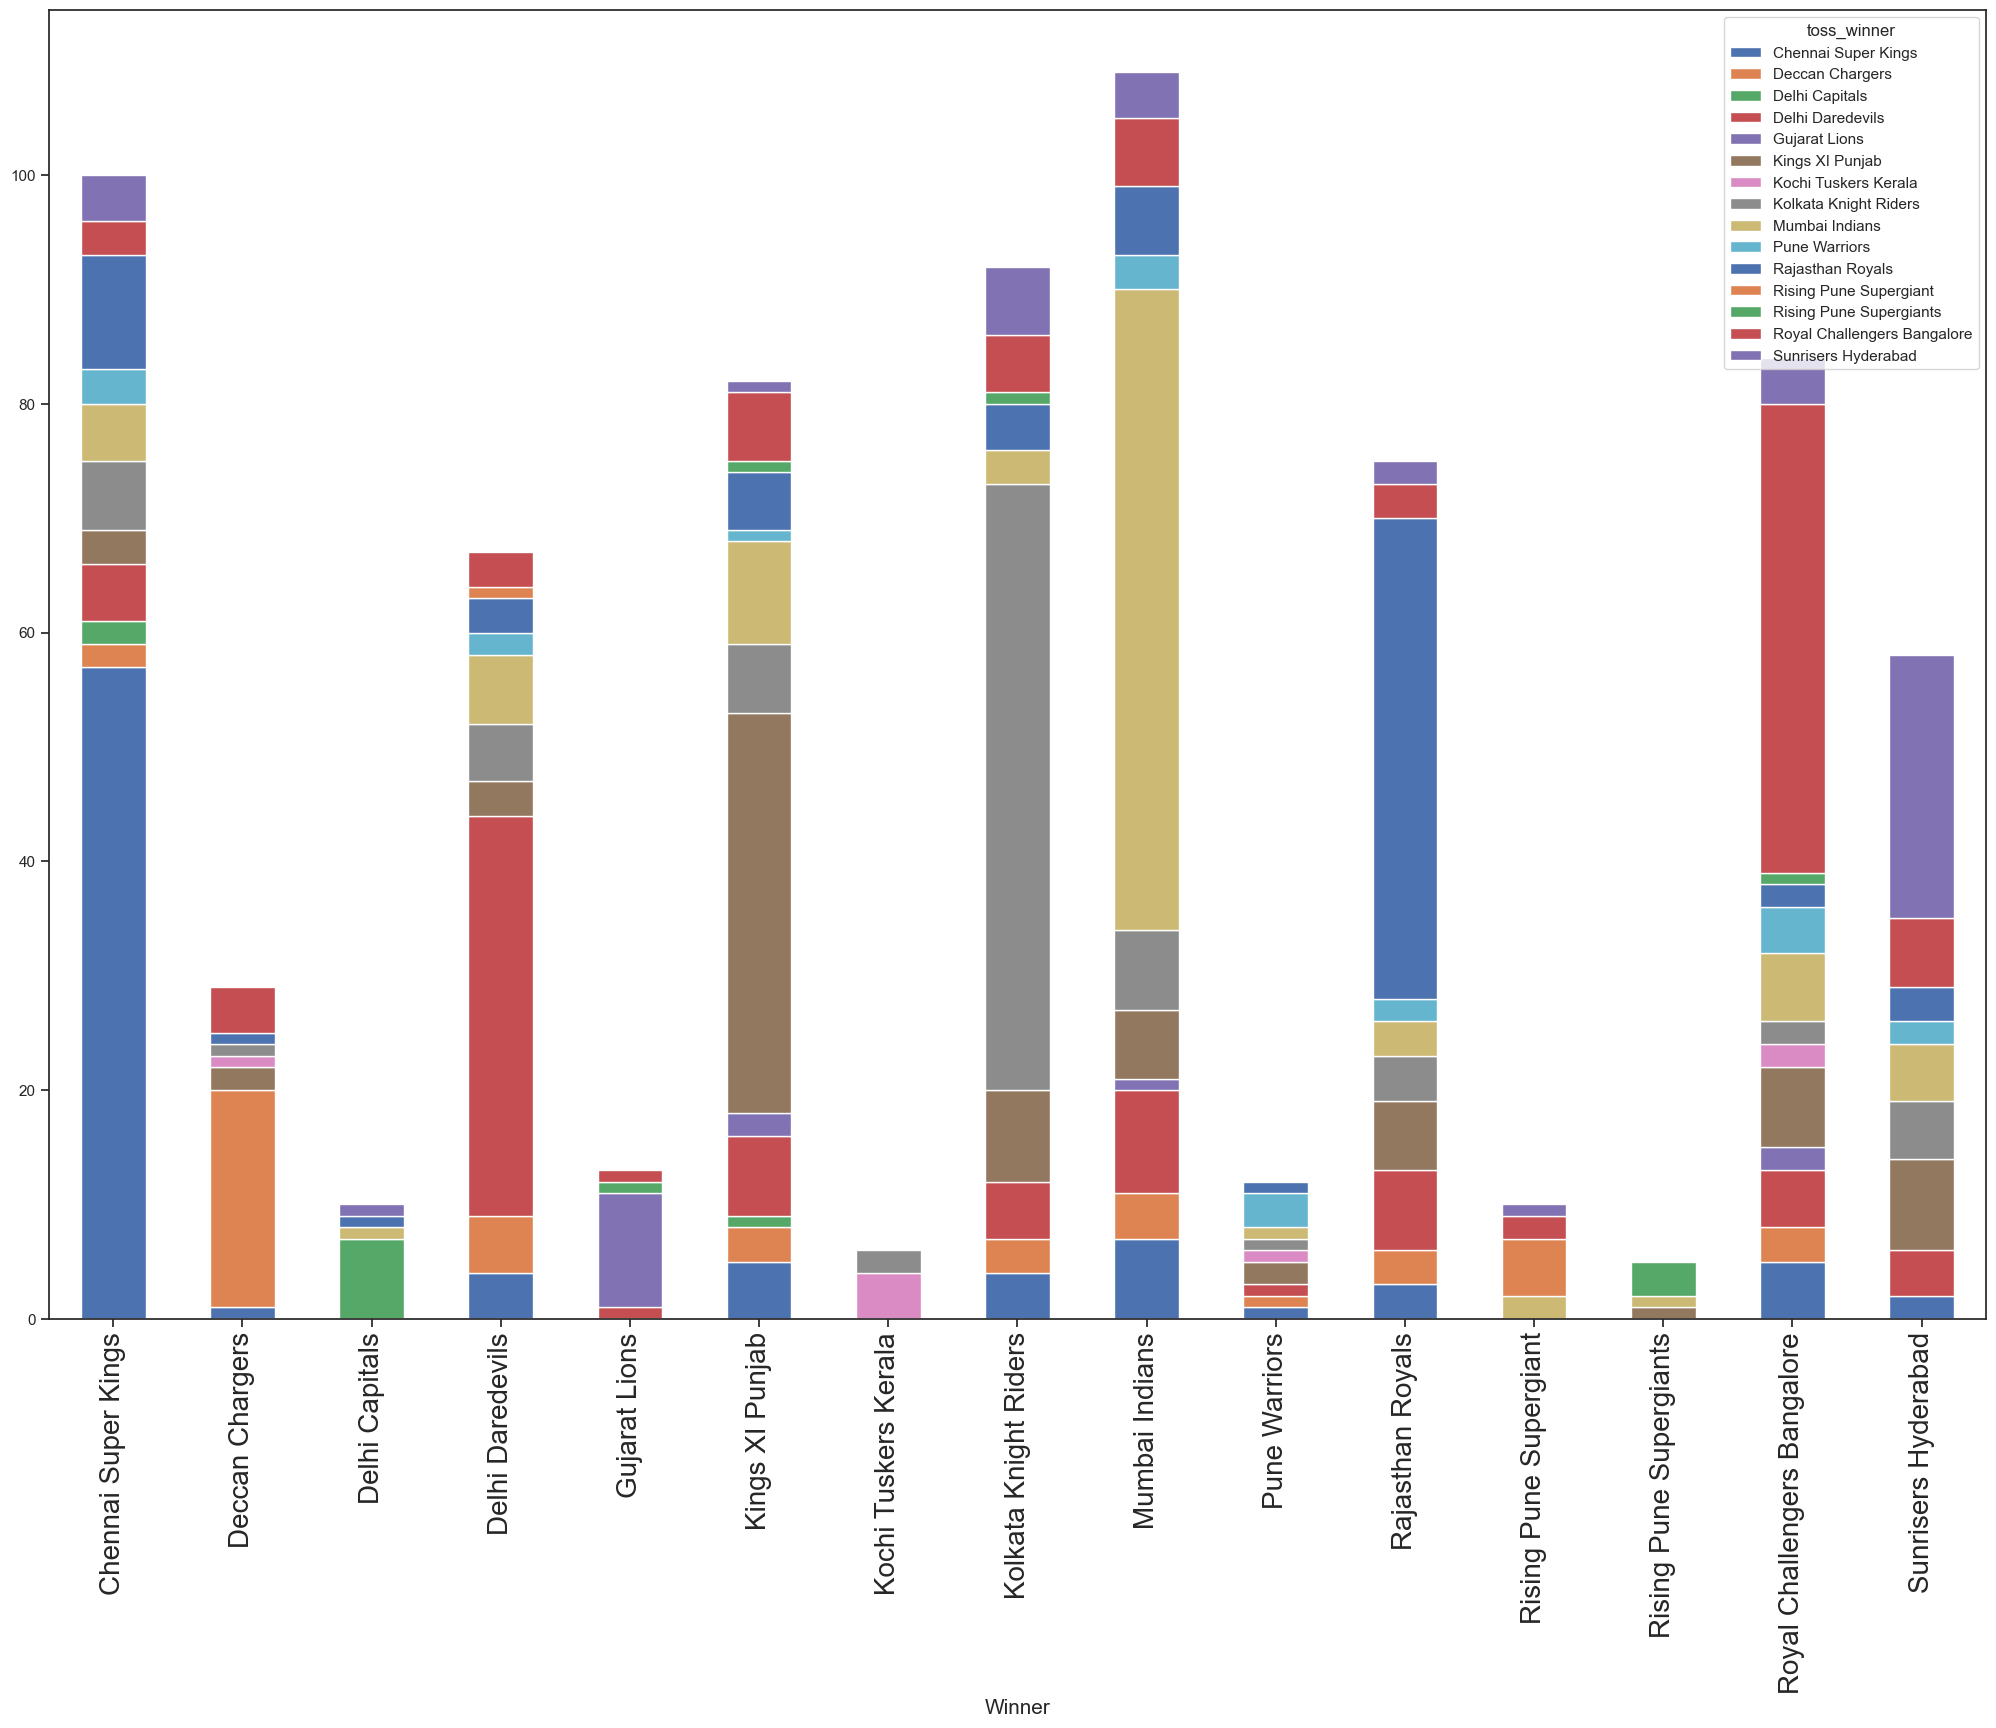

In [11]:
pd.crosstab(matches['winner'], matches['toss_winner']).drop(0).plot(kind='bar',stacked=True,figsize=(25,17))
plt.xticks(fontsize=20)
plt.xlabel('Winner', fontsize=15)

Text(0.5, 0, 'Winner')

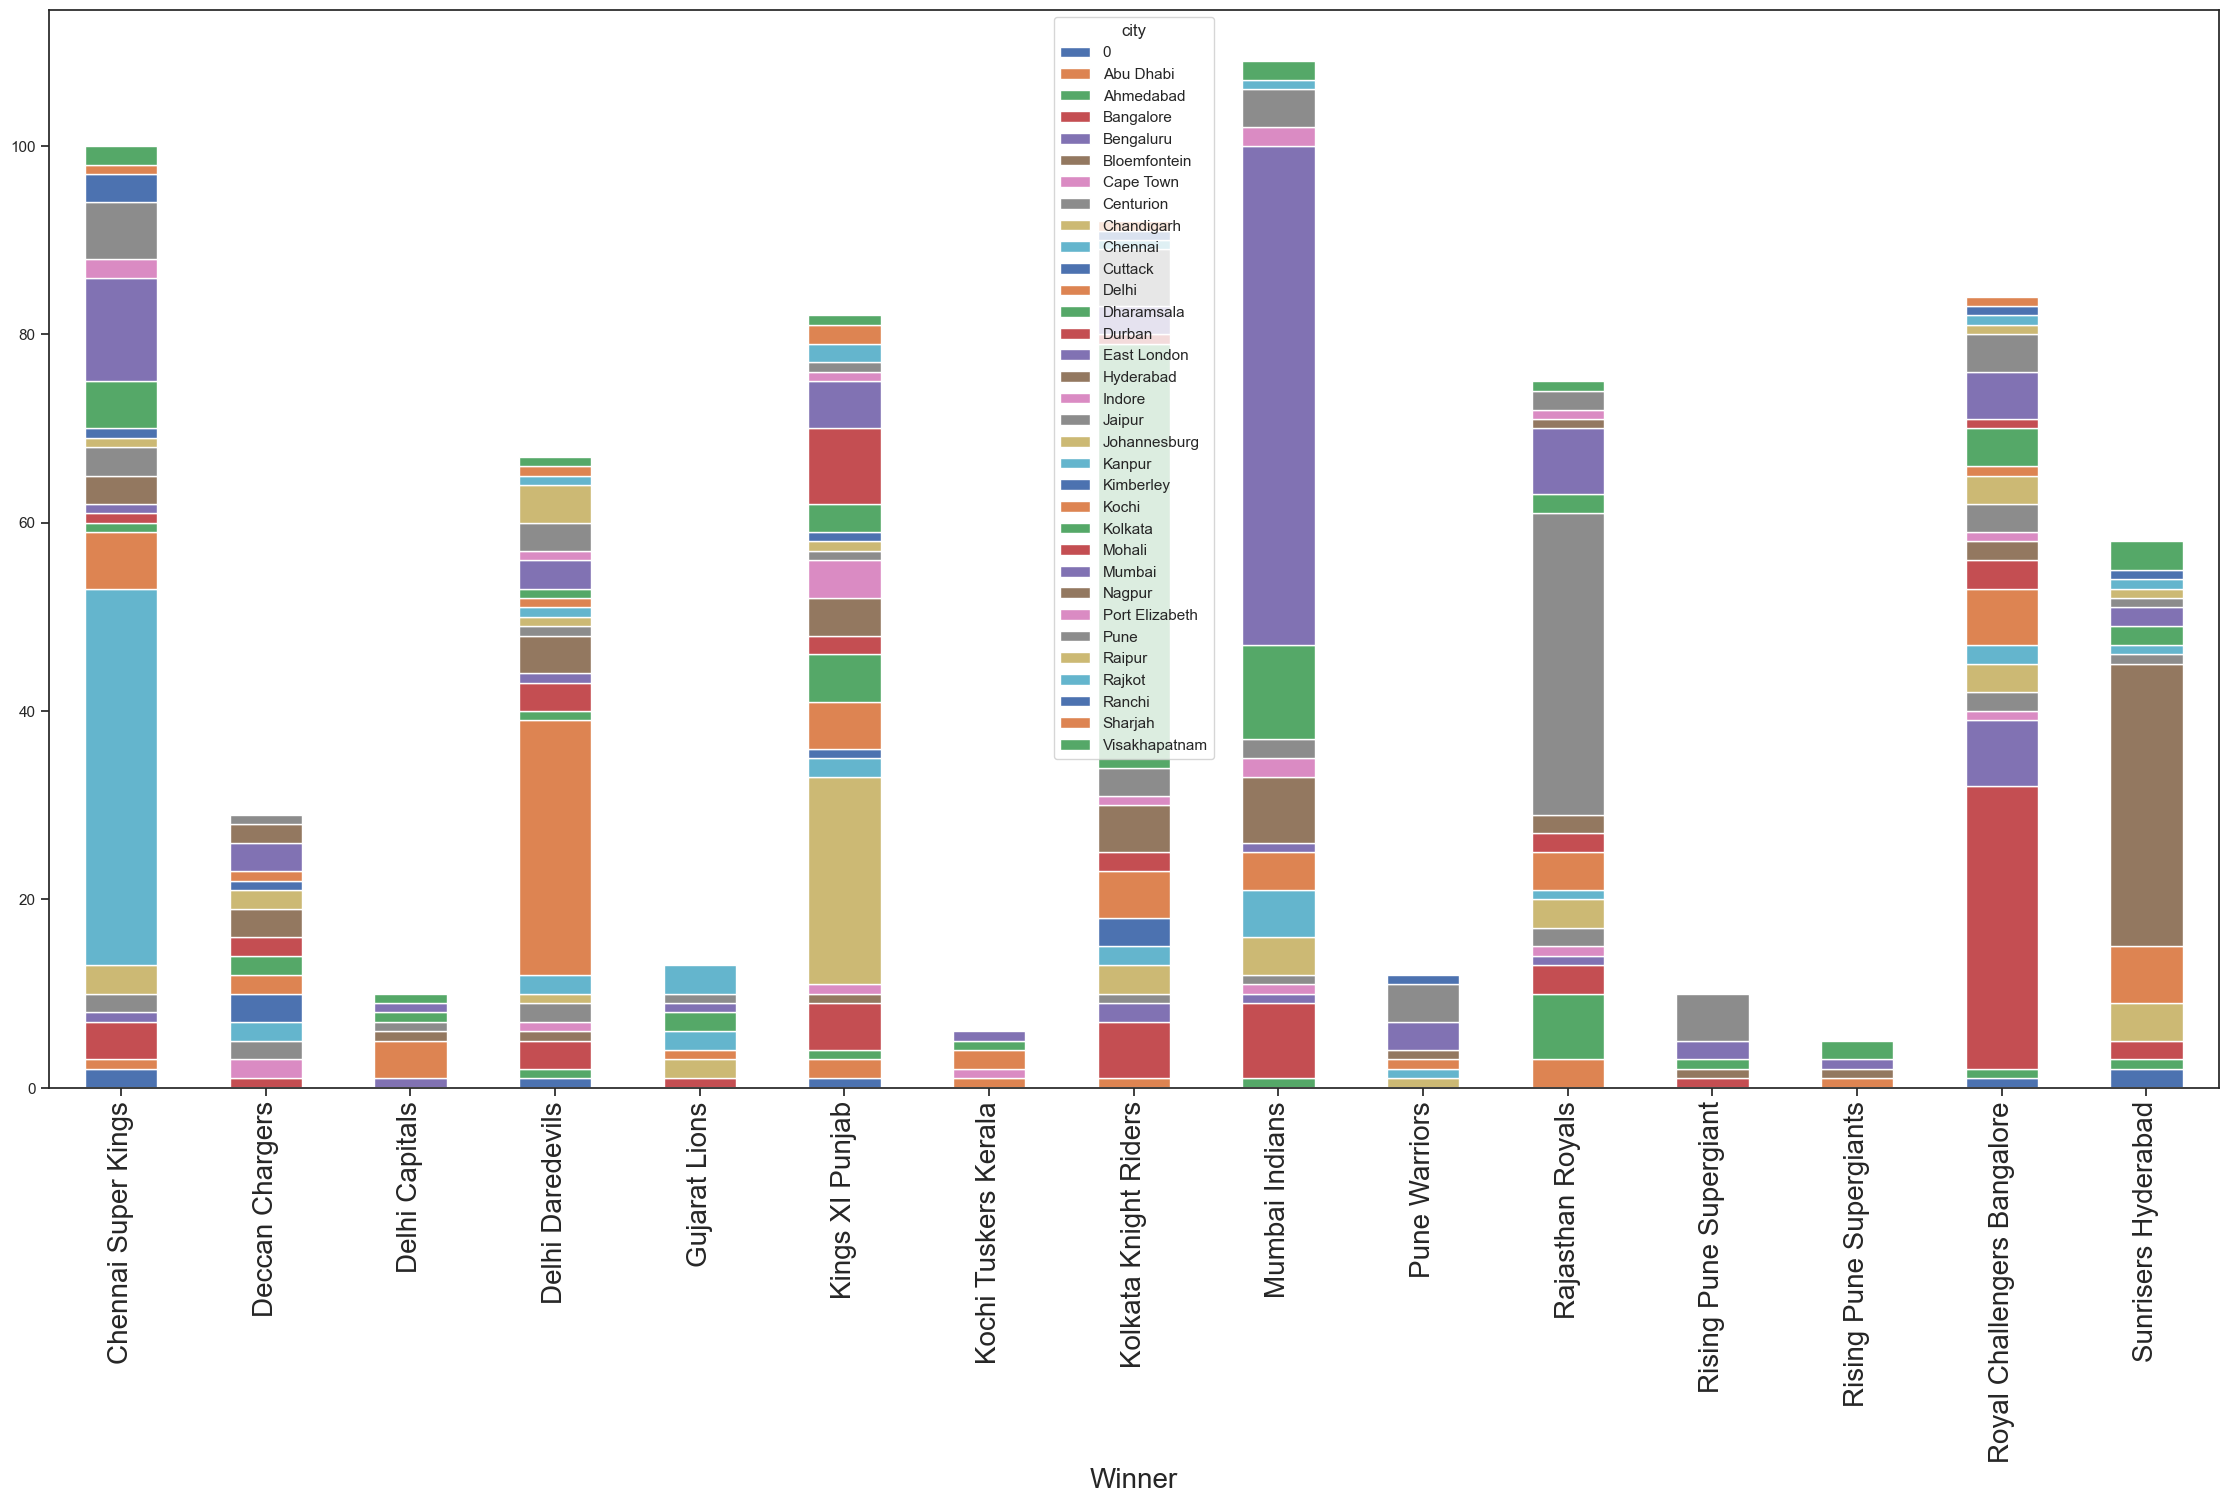

In [12]:
pd.crosstab(matches['winner'], matches['city']).drop(0).plot(kind='bar',stacked=True,figsize=(28,14))
plt.xticks(fontsize=20)
plt.xlabel('Winner',fontsize=20)

Text(0.5, 0, 'Venue')

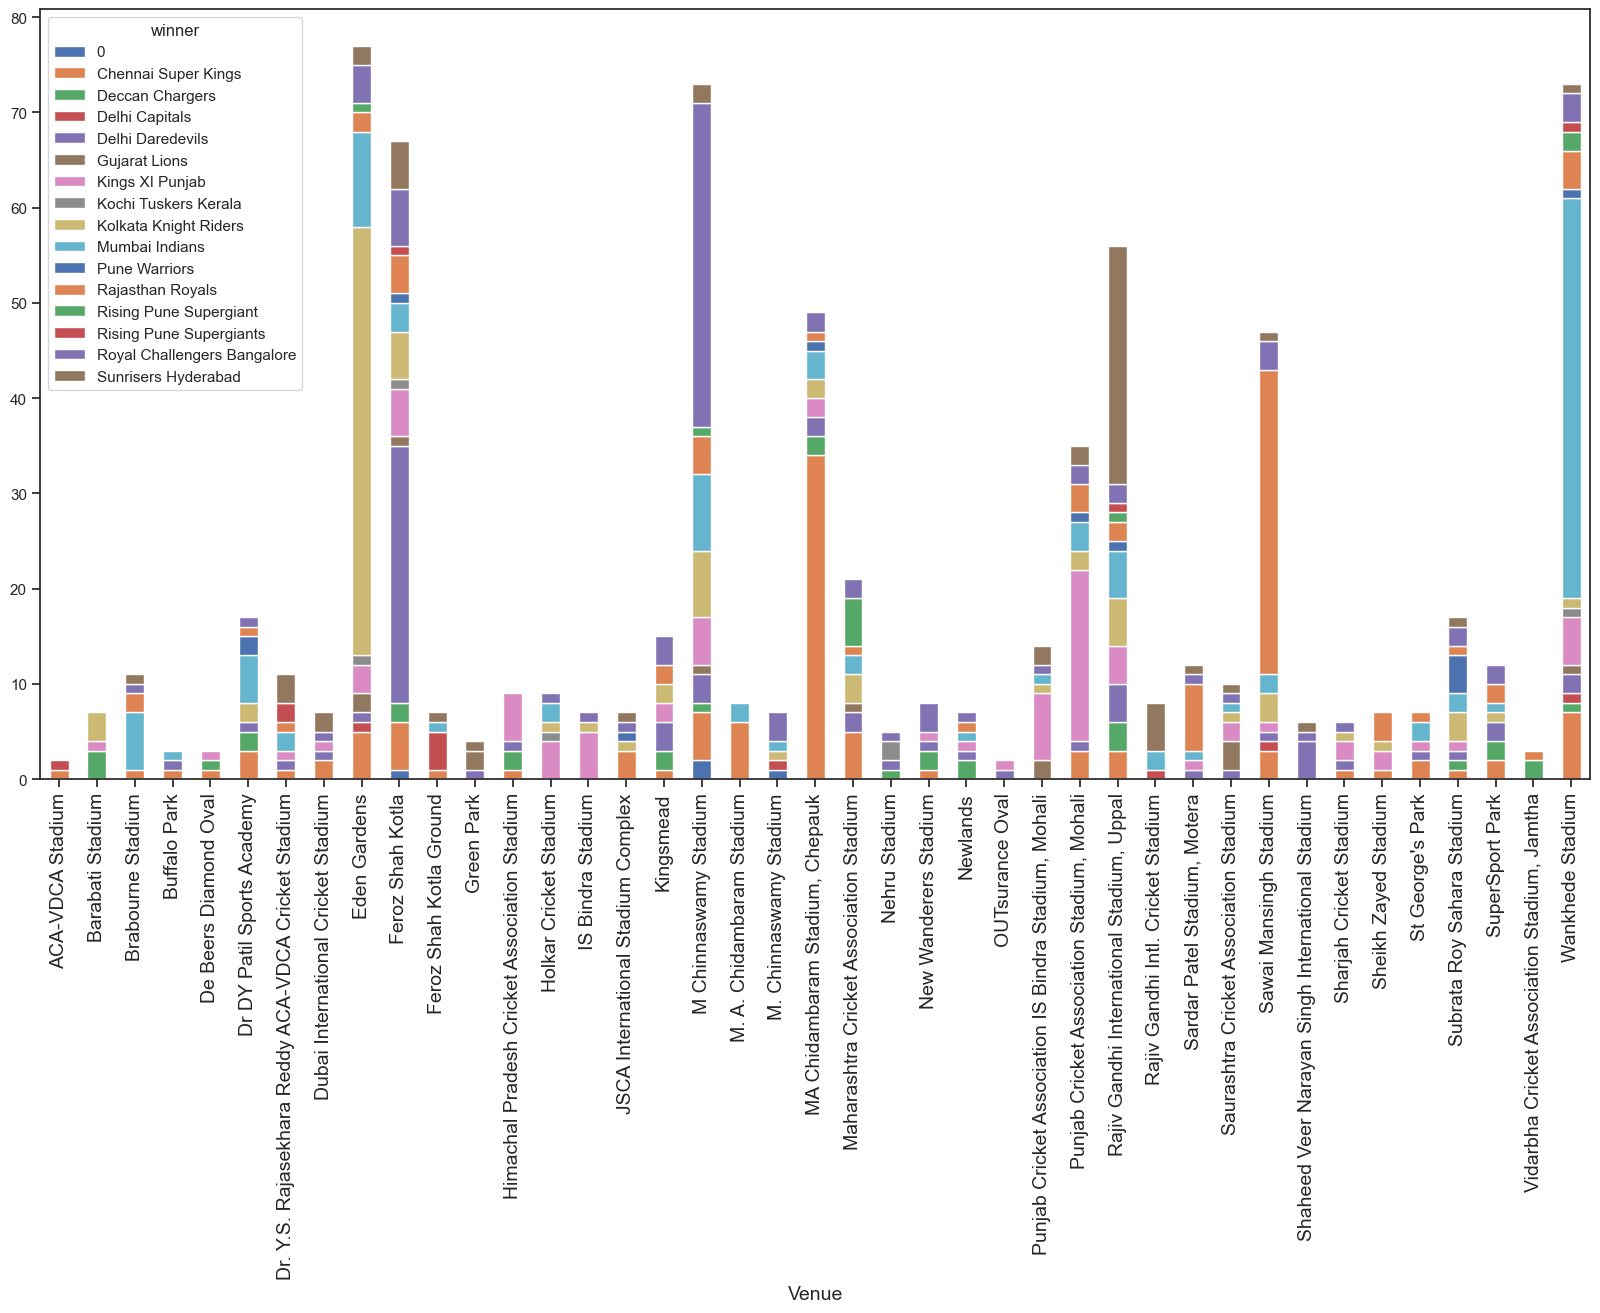

In [13]:
pd.crosstab(matches['venue'], matches['winner']).plot(kind='bar',stacked=True,figsize=(20,10))
plt.xticks(fontsize=14)
plt.xlabel('Venue',fontsize=14)

Text(0.5, 1.0, 'Man of the Match (top 10)')

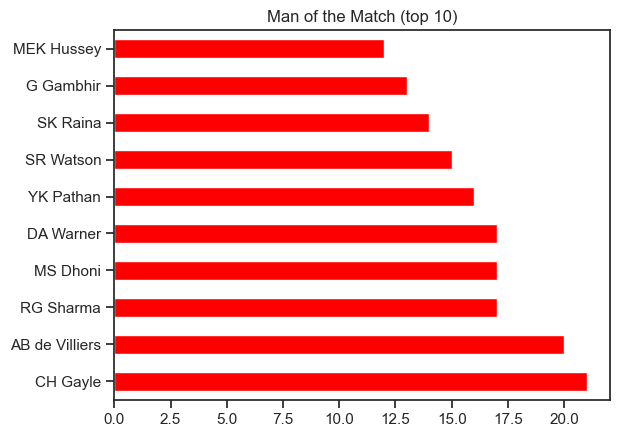

In [28]:
pom=matches['player_of_match'].value_counts().sort_values(ascending= False)[:10]
pom.plot.barh(color='red')
plt.title('Man of the Match (top 10)')

Text(0.5, 1.0, 'Top 10 scoring Batsmen')

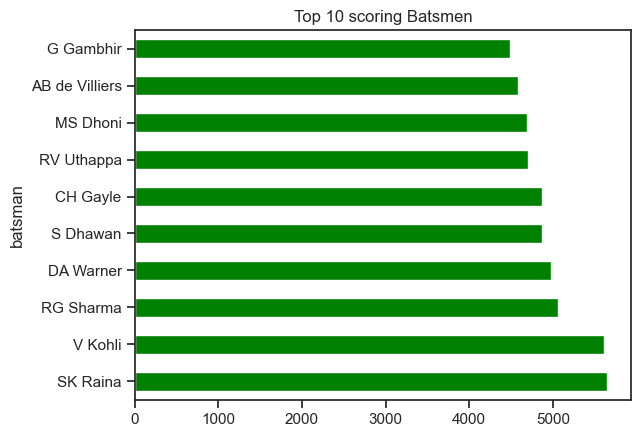

In [15]:
total=deli.groupby('batsman')['total_runs'].sum().sort_values(ascending= False)[:10]
total.plot.barh(color='green')
plt.title('Top 10 scoring Batsmen')

Text(0.5, 1.0, 'Top 10 bowlers who gave away minimum runs')

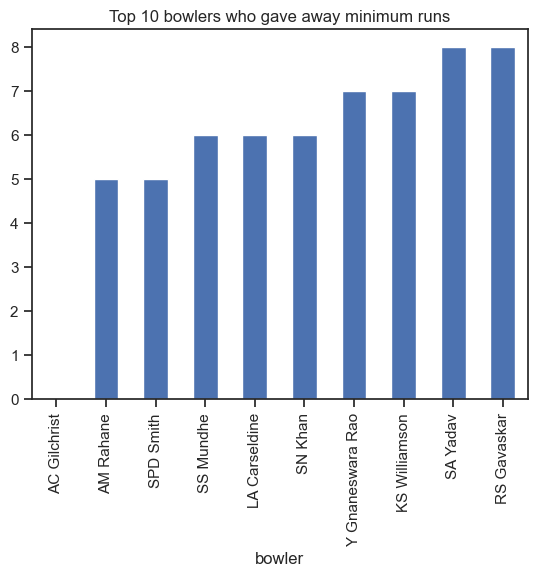

In [64]:
a=deli.groupby('bowler')['total_runs'].sum().sort_values(ascending= True)[:10]
a.plot.bar()
plt.title('Top 10 bowlers who gave away minimum runs')

Player data:

In [77]:
df_6=deli[deli['batsman_runs']==6]
df_6.groupby('batsman')['batsman_runs'].sum().sort_values(ascending= False)

batsman
CH Gayle          1962
AB de Villiers    1284
MS Dhoni          1242
SK Raina          1170
RG Sharma         1164
                  ... 
RV Gomez             6
KJ Abbott            6
Basil Thampi         6
RJ Peterson          6
Anureet Singh        6
Name: batsman_runs, Length: 336, dtype: int64

In [78]:
df_6.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending= False)

batting_team
Royal Challengers Bangalore    6792
Mumbai Indians                 6576
Kings XI Punjab                5856
Chennai Super Kings            5838
Kolkata Knight Riders          5580
Delhi Daredevils               4806
Rajasthan Royals               4086
Sunrisers Hyderabad            3198
Deccan Chargers                2400
Pune Warriors                  1176
Gujarat Lions                   930
Rising Pune Supergiant          534
Delhi Capitals                  522
Rising Pune Supergiants         408
Kochi Tuskers Kerala            318
Name: batsman_runs, dtype: int64

In [79]:
df_4=deli[deli['batsman_runs']==4]
df_4.groupby('batsman')['batsman_runs'].sum().sort_values(ascending= False)

batsman
S Dhawan        2104
SK Raina        1980
G Gambhir       1968
V Kohli         1928
DA Warner       1836
                ... 
AR Bawne           4
S Singh            4
S Nadeem           4
AN Ghosh           4
DE Bollinger       4
Name: batsman_runs, Length: 410, dtype: int64

In [80]:
df_4.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending= False)

batting_team
Mumbai Indians                 10352
Kings XI Punjab                 9832
Kolkata Knight Riders           9736
Royal Challengers Bangalore     9440
Chennai Super Kings             8772
Delhi Daredevils                8632
Rajasthan Royals                8140
Sunrisers Hyderabad             5776
Deccan Chargers                 3828
Pune Warriors                   2100
Gujarat Lions                   1840
Delhi Capitals                   968
Rising Pune Supergiant           788
Rising Pune Supergiants          684
Kochi Tuskers Kerala             680
Name: batsman_runs, dtype: int64

C:\Users\mehta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

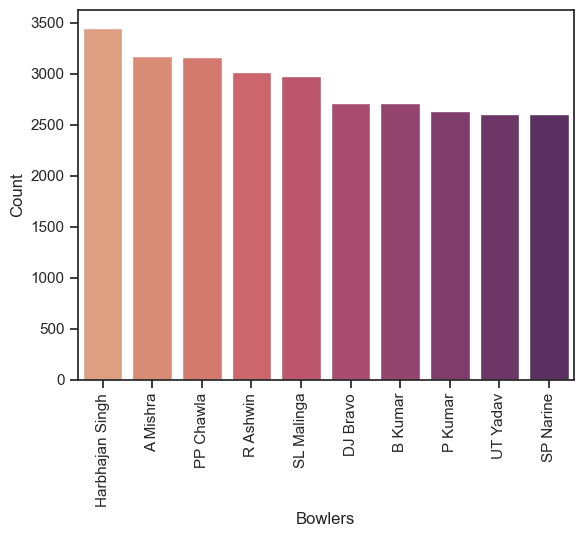

In [65]:
## To find the most-played bowler.
plt.xticks(rotation=90)
x=deli['bowler'].value_counts()[:10]
sns.barplot(x.index , x, palette='flare')
plt.xlabel('Bowlers')
plt.ylabel('Count')

C:\Users\mehta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Maximum dismissals (Top 10)')

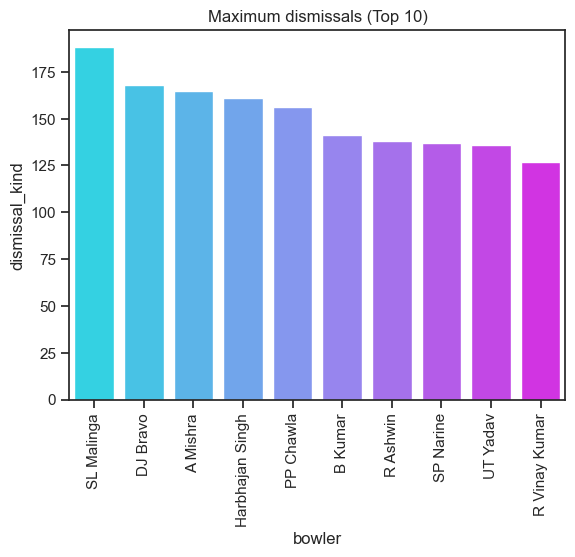

In [66]:
## To find players with maximum dismissals.
db=deli[deli['dismissal_kind']!=0]
x=db.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False)[:10]
sns.barplot(x.index, x, palette='cool')
plt.xticks(rotation=90)
plt.title('Maximum dismissals (Top 10)')

In [22]:
# To get all types of batsmen dismissals.
deli['dismissal_kind'].unique()

array([0, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

Dismissal by run out, stumped and caught:

In [34]:
df= deli[deli['dismissal_kind']=='stumped']
df.groupby('fielder')['dismissal_kind'].count().sort_values(ascending=False)[:10]

fielder
MS Dhoni         38
RV Uthappa       32
KD Karthik       29
WP Saha          18
PA Patel         16
AC Gilchrist     16
NV Ojha          10
KC Sangakkara     9
RR Pant           9
Q de Kock         8
Name: dismissal_kind, dtype: int64

In [43]:
df= deli[deli['dismissal_kind']=='caught']
df.groupby('fielder')['dismissal_kind'].count().sort_values(ascending=False)[:10]

fielder
KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: dismissal_kind, dtype: int64

In [42]:
df= deli[deli['dismissal_kind']=='run out']
df.groupby('fielder')['dismissal_kind'].count().sort_values(ascending=False)[:10]

fielder
MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
MK Pandey         14
AB de Villiers    14
KD Karthik        14
PA Patel          12
DJ Bravo          12
RG Sharma         10
Name: dismissal_kind, dtype: int64

### Conclusion:

- Majority of the teams that won the toss ended up winning the match.
- Majority of the teams that won the toss chose to field.
- Teams tend to win maximum number of matches in their home ground (their own city).
- Mumbai Indians won the most number of tosses, and matches as well.
- Royal Challengers Bangalore account for the maximum number of sixes.
- Mumbai Indians account for the maximum number of fours.

Player performance:

- M.S Dhoni took the most number of stumpings and run out dismissals in the history of IPL.
- K.D Karthik took the highest number of catches.
- Chris Gayle scored the maximum number of sixes.
- Shikhar Dhawan scored the maximum number of fours.
- Chris Gayle won Man of the Match maximum number of times.
- SK Raina and Virat Kohli are the top scoring batsmen.
- AC Gilchrist and AM Rahane gave away the minimum runs.
- Harbajan Singh is the most played bowler.
- SL Malinga took the most number of wickets.